In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247480,153590.0,2.173462,-1.774313,-1.172828,-1.457921,-1.033446,0.330303,-1.236982,0.125107,-0.760168,...,-0.499767,-0.921152,0.241242,0.138687,-0.166321,-0.343854,-0.002915,-0.055585,64.17,0
74247,55485.0,-2.604817,-4.150066,0.689230,0.287528,-5.138099,3.060756,3.826926,0.037469,-1.042032,...,1.128774,1.087187,3.171152,0.124698,0.073273,-0.148782,-0.253123,0.247805,1400.00,0
106191,69865.0,-0.425774,1.293259,0.801106,0.325041,0.680234,-0.864946,1.326037,-0.468372,-0.328139,...,-0.017577,0.126121,-0.365102,0.021202,0.454935,-0.349783,-0.179263,-0.153583,3.85,0
38653,39483.0,-0.586992,-0.605309,3.146185,0.590582,-0.893532,0.410539,-0.990942,0.258353,-0.219824,...,-0.050790,0.650522,-0.020429,0.388812,-0.501000,-0.170656,0.087263,-0.050839,11.99,0
174558,121968.0,2.174063,-1.107607,-0.986000,-1.298629,-0.589451,0.151376,-1.122609,0.156741,-0.056413,...,-0.012053,-0.230743,0.211067,-1.514595,-0.448013,-0.405523,-0.007728,-0.062990,31.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


# Data Visualization

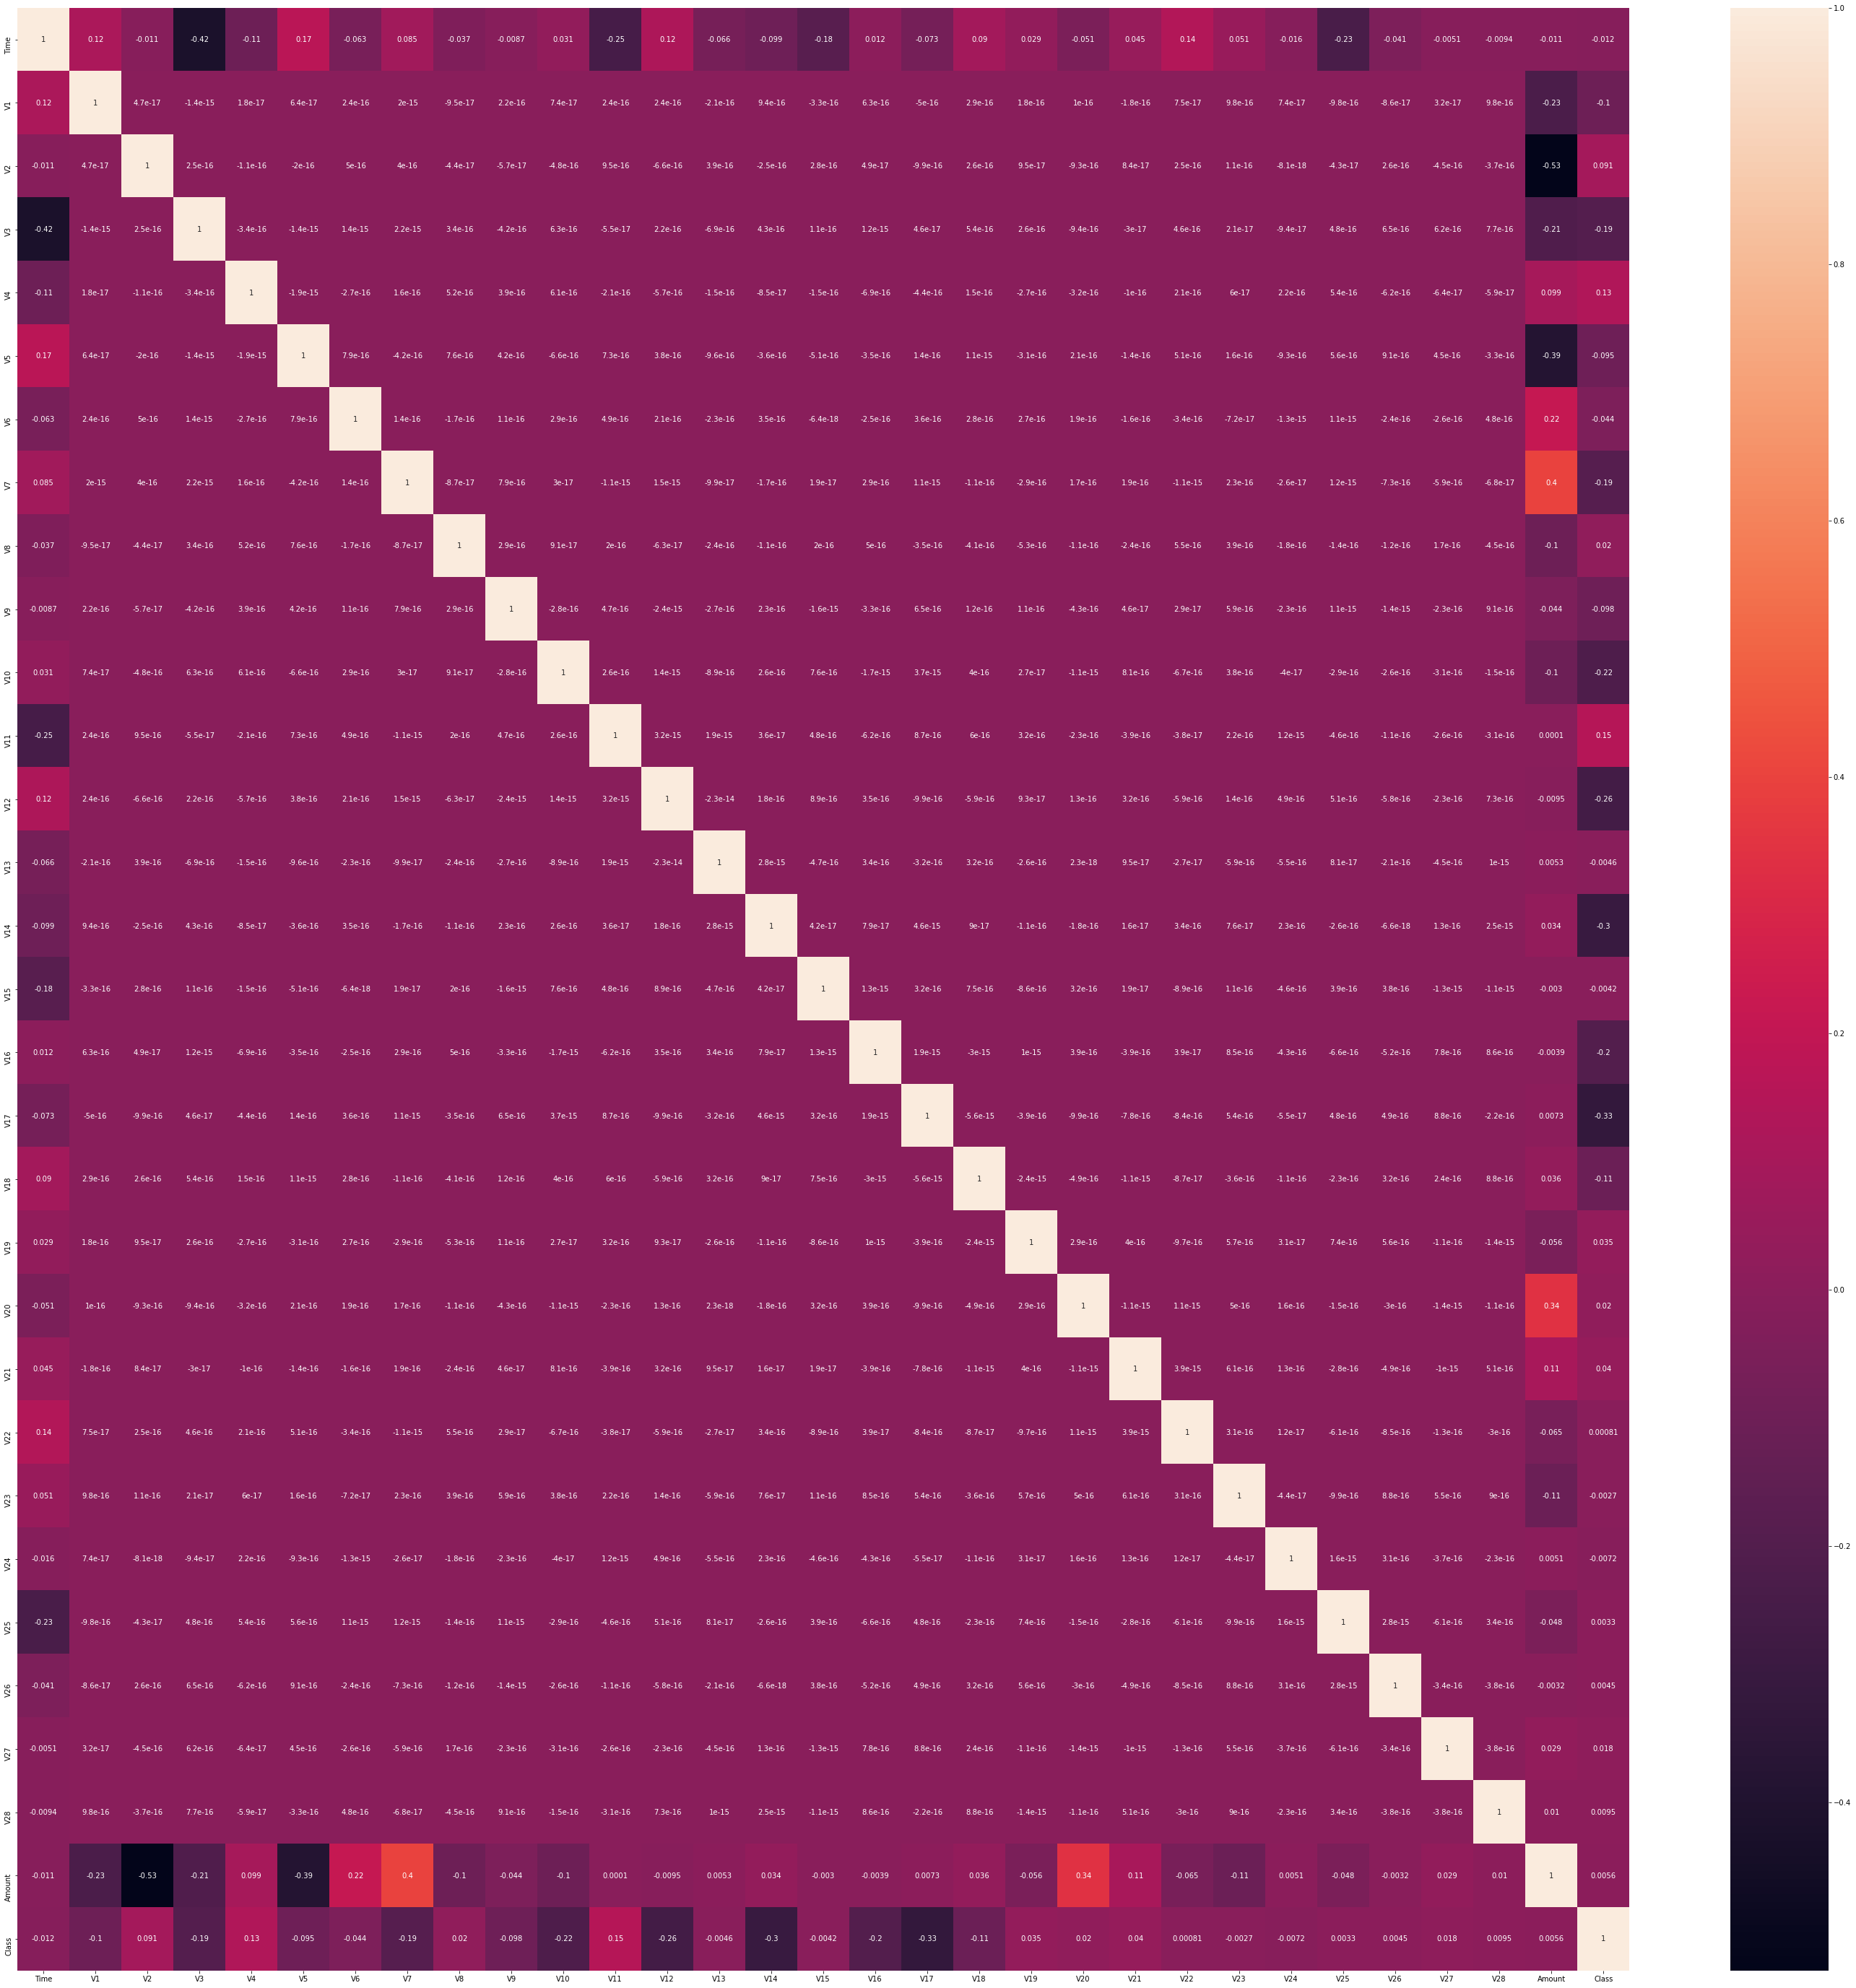

In [10]:
plt.figure(figsize=(50,50))
g=sns.heatmap(df.corr(),annot=True) 

Text(0, 0.5, 'Frequency')

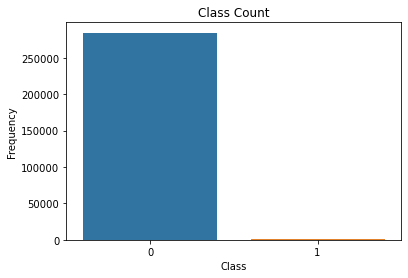

In [11]:
class_count = pd.value_counts(df['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [12]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

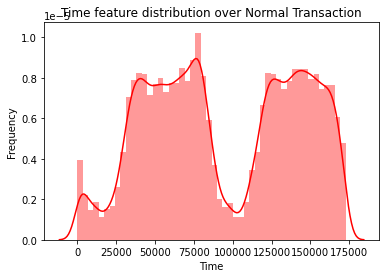

In [13]:
sns.distplot(normal.Time, color='r')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

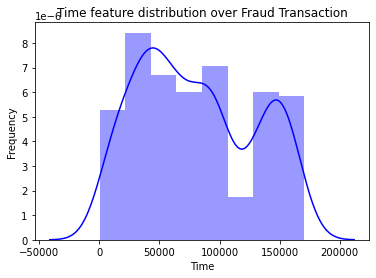

In [14]:
sns.distplot(fraud.Time, color='b')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

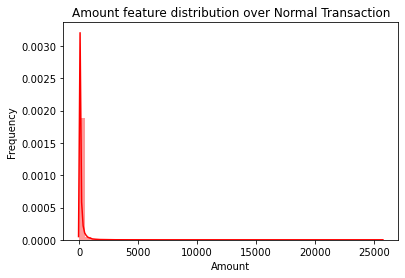

In [15]:
sns.distplot(normal.Amount, color='r')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

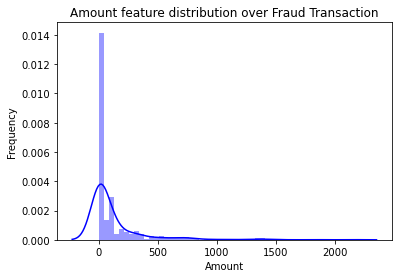

In [16]:
sns.distplot(fraud.Amount, color='b')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

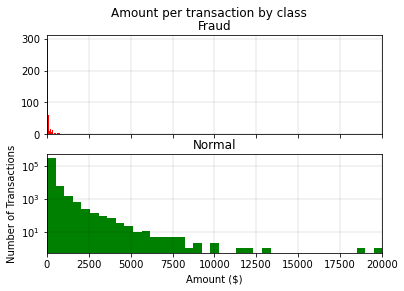

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins, color = 'r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins, color = 'g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

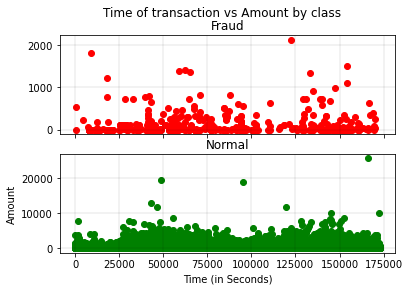

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, color = 'r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount, color = 'g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# Data Pre-processing

In [19]:
X = df.drop('Class', axis=1)
y = df.Class

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [23]:
X_train

array([[-0.73827037, -0.83952517,  0.73847641, ..., -0.64982719,
        -0.30113087, -0.19601641],
       [-1.03507885, -0.11917111, -0.2950571 , ...,  0.22137574,
         0.63682676, -0.10722282],
       [-1.33138188,  0.5785535 , -0.46388507, ..., -0.15076433,
         0.03581761,  0.08669645],
       ...,
       [-0.31591904, -0.07424934,  0.59727105, ..., -0.29905939,
        -0.59083121, -0.33041514],
       [-0.14456916, -1.50191272,  1.41496185, ...,  1.22948661,
         1.00911076, -0.34187489],
       [-0.38782028,  0.62876478, -0.47012345, ...,  0.00354724,
         0.11523561,  0.0946871 ]])

In [24]:
X_test

array([[-1.12233335e+00, -8.41997978e+00,  5.15554636e+00, ...,
        -4.99174151e+00, -3.13684970e+00,  1.07379429e+00],
       [-1.06429005e+00,  1.73587283e-01, -1.64624981e+00, ...,
         1.01928040e-01,  3.06049476e-01,  1.68158991e+00],
       [-1.24913984e+00,  7.13555446e-01, -3.53555677e-01, ...,
         2.87539667e-02,  1.31260321e-02, -2.24938641e-01],
       ...,
       [ 8.04152307e-01,  9.54488939e-01, -3.78560266e-01, ...,
        -2.36518895e-01, -1.38199366e-01,  4.25640089e-03],
       [ 5.53298278e-01, -6.81442140e-01,  6.50875937e-01, ...,
        -7.52756086e-01, -6.43356366e-01, -2.67815265e-01],
       [-4.81140253e-01,  7.50664156e-01, -6.69168851e-01, ...,
         1.23320808e-01,  4.47804066e-02, -2.84186339e-01]])

# Model Building

# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)

In [28]:
prediction=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,prediction)

0.9991994606893064

# DecisionTree

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)

In [32]:
prediction=model.predict(X_test)

In [33]:
accuracy_score(y_test,prediction)

0.9991292379427544

# RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)

In [35]:
prediction=model.predict(X_test)

In [36]:
accuracy_score(y_test,prediction)

0.999592708069998